# Import Packages

In [1]:
import factor_tester as ft
import numpy as np
import pandas as pd 
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

# Load Data

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
df = pd.read_csv("./Data/Fast.csv")

The Universe is S&P500

BackTest Period: 2019-03-01 -> 2020-02-28; Use Data Period: 2018-03-01 -> 2019-02-28  
Trading Period: 2020-03-02 -> 2020-03-31; Use Data Period: 2019-03-01 -> 2020-02-28 

In [4]:
df.head(3)

,Date,Ticker,Close,Return,1W,1M,3M,6M,SPY Close,SPY Return,Rf,Beta,Alpha,1W + 1M,1W + 3M,1W + 6M,1M + 3M,1M + 6M,3M + 6M,1W + 1M + 3M,1W + 1M + 6M,1W + 3M + 6M,1M + 3M + 6M,Total Rank
0,2018-03-01,MMM,231.339996,-0.017706,7.0,8.0,7.0,4.0,267.700012,-0.014541,0.000081,1.074155,-0.524473,7.5,7.0,5.5,7.5,6.0,5.5,7.333333,6.333333,6.000000,6.333333,6.50
1,2018-03-01,AOS,62.060001,-0.033183,10.0,6.0,6.0,4.0,267.700012,-0.014541,0.000081,1.153893,-4.130742,8.0,8.0,7.0,6.0,5.0,5.0,7.333333,6.666667,6.666667,5.333333,6.50
2,2018-03-01,ABT,58.790001,-0.025526,4.0,6.0,4.0,3.0,267.700012,-0.014541,0.000081,0.911332,-3.095087,5.0,4.0,3.5,5.0,4.5,3.5,4.666667,4.333333,3.666667,4.333333,4.25


Factors are Momentum: 1-Week, 1-Month, 3-Month, 6-Month  
Combine Factors: 1 Week + 1 Month (average), etc.     

In [5]:
Factors = ['1W', '1M', '3M', '6M', 
           '1W + 1M', '1W + 3M', '1W + 6M', '1M + 3M', '1M + 6M', '3M + 6M',
           '1W + 1M + 3M', '1W + 1M + 6M', '1W + 3M + 6M', '1M + 3M + 6M',
           'Total Rank']

In [6]:
Tickers = list(set(df['Ticker'].values))
Date1 = '2019-02-28'
Date2 = '2020-02-28'  # '2020-02-29' is not trading day
Date3 = '2020-03-31'

# BackTesting

In [7]:
BT = ft.BackTest(df, Factors, 'BackTest')

In [8]:
BT.Construct_DF(Tickers, Date1, Date2)

In [9]:
N = 7

## Show BackTesting Portfolio

**<font color = red size = 3>Selection Criteria</font>**

Every Stock has a series of daily ranks on each Factor;  
Take the average of these ranks  
e.g. AAPL 1-Week Momentum Average Rank is 7.33; 

For each factor, select the highest 7 stocks and put into Top List and put lowest 7 stocks into Bottom List;  
Then I gather all the stocks and collect their **<font color = red size = 3>Frequency</font>**

Select 2 stocks which appear most in Top List -> Long stock1 and stock2;  
Select 2 stocks which appear most in Bottom List -> Short stock1 and stock2

In [10]:
BT.Select_Stock_List(N)
BT.Determine_Stock()

**<font color = red size = 3>Optimize</font>**

Each Side on Long and Short has $25e6  
Optimize 2 stocks on Long side and 2 stocks on Short side  
Minimize each side variance

In [11]:
BT.Show_Portfolio()
BT.Portfolio_Info

,Side,1st Stock,1st Weight,2nd Stock,2nd Weight
0,Long,VRSN,0.351041,AES,0.648920
1,Short,AMG,0.574647,IVZ,0.425236


In [12]:
BT.Cal_PnL()

## Show PnL & Return DataFrame

In [13]:
BT.PnL.head(3)

,Daily PnL,Net Value,Daily Return,SPY Daily,Net Value Level,SPY Level
Date,,,,,,
2019-03-01,0.000000,5.000000e+07,0.000000,0.000000,1.000000,1.000000
2019-03-04,-467243.428074,4.953276e+07,-0.009345,-0.003637,0.990655,0.996363
2019-03-05,522185.210190,5.005494e+07,0.010444,-0.001360,1.001099,0.995002


In [14]:
BT.PnL.tail(3)

,Daily PnL,Net Value,Daily Return,SPY Daily,Net Value Level,SPY Level
Date,,,,,,
2020-02-26,-230353.146666,5.780320e+07,-0.004607,-0.003678,1.156064,1.113332
2020-02-27,21521.752965,5.782472e+07,0.000430,-0.044912,1.156494,1.068421
2020-02-28,-718260.856548,5.710646e+07,-0.014365,-0.004202,1.142129,1.064219


## Portfolio Risk Characteristics

In [15]:
BT.Summarize('d')

Summary Statistics (Return):
count    250.000000
mean       0.000569
std        0.007968
min       -0.026890
25%       -0.004366
50%        0.001278
75%        0.004963
max        0.034520
Name: Daily Return, dtype: float64
--------------------------------------------
Summary Statistics (PnL):
count    2.500000e+02
mean     2.842583e+04
std      3.984165e+05
min     -1.344518e+06
25%     -2.182867e+05
50%      6.387704e+04
75%      2.481495e+05
max      1.726014e+06
Name: Daily PnL, dtype: float64
--------------------------------------------
Summary Statistics (Annualized Return):
Mean:  0.143266164885648
Vol: 0.1262400818803466
t-statistics:  1.1348706587614474 ;  p-value:  0.25752078932524897
--------------------------------------------
Total PnL:  7106456.59155
Final Wealth:  57106456.59155
--------------------------------------------
Information Ratio: 0.39
--------------------------------------------
Maximum DrawDown: 6.99%
--------------------------------------------
VaR at 95% L

## Plot Time Series

D:\Anaconda\Setup\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


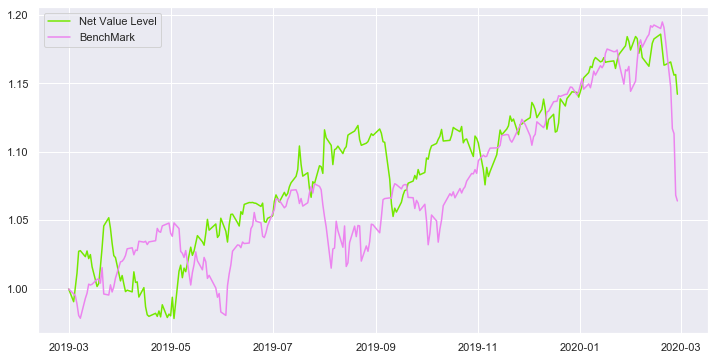

In [16]:
BT.Plot_Return()

# PaperTrading in March 2020

In [17]:
TD = ft.Trade(df, Factors, 'Trade')

In [18]:
TD.Construct_DF(Tickers, Date1, Date2, Date3)

In [19]:
TD.Select_Stock_List(N) # N = 7

## Show Paper Trading Portfolio

In [20]:
TD.Determine_Stock()
TD.Show_Portfolio()
TD.Portfolio_Info

,Side,1st Stock,1st Weight,2nd Stock,2nd Weight
0,Long,GPN,0.524382,MCO,0.475012
1,Short,MAC,0.895765,RRC,0.104193


In [21]:
TD.Cal_PnL()

## Show 1-Month Daily PnL & Return DataFrame

In [22]:
TD.PnL

,Daily PnL,Net Value,Daily Return,SPY Daily,Net Value Level,SPY Level
Date,,,,,,
2020-03-02,0.000000e+00,5.000000e+07,0.000000,0.000000,1.000000,1.000000
2020-03-03,-8.877276e+05,4.911227e+07,-0.017755,-0.028632,0.982245,0.971368
2020-03-04,3.561435e+05,4.946842e+07,0.007123,0.042033,0.989368,1.013401
2020-03-05,-1.057107e+05,4.936271e+07,-0.002114,-0.033242,0.987254,0.980159
2020-03-06,-1.656012e+05,4.919710e+07,-0.003312,-0.016531,0.983942,0.963628
2020-03-09,1.252318e+06,5.044942e+07,0.025046,-0.078094,1.008988,0.885533
2020-03-10,9.797666e+05,5.142919e+07,0.019595,0.051745,1.028584,0.937278
2020-03-11,1.158863e+06,5.258805e+07,0.023177,-0.048748,1.051761,0.888530
2020-03-12,-8.009104e+04,5.250796e+07,-0.001602,-0.095677,1.050159,0.792853


## Plot Time Series

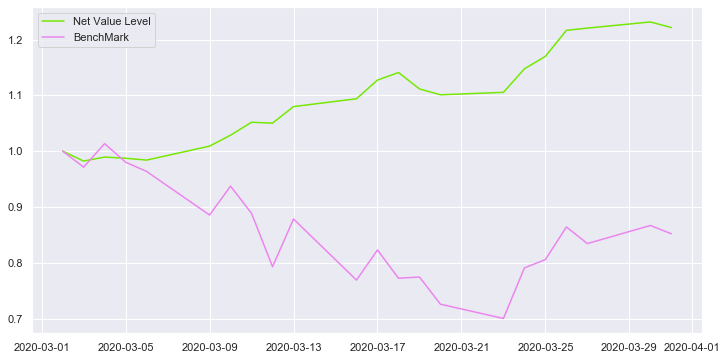

In [23]:
TD.Plot_Return()

In [45]:
a = TD.Trading_df.copy()
r1 = a[a.Ticker == 'GPN']['Return'][1:]
r2 = a[a.Ticker == 'MCO']['Return'][1:]
r3 = a[a.Ticker == 'MAC']['Return'][1:]
r4 = a[a.Ticker == 'RRC']['Return'][1:]
r = a[a.Ticker == 'GPN']['SPY Return'][1:]

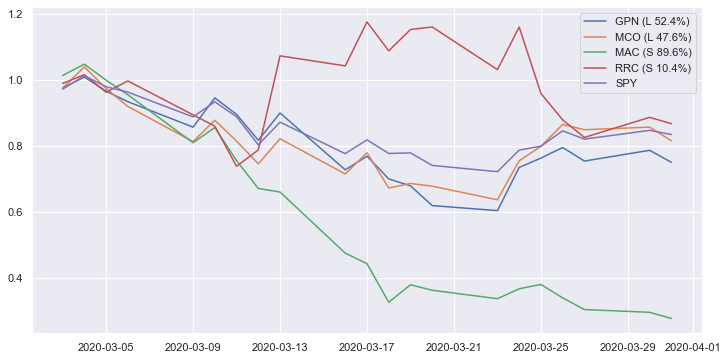

In [46]:
plt.figure(figsize=(12,6))
# plt.plot(((r1+1).cumprod()) * 0.524)
# plt.plot(((r2+1).cumprod()) * 0.476)
# plt.plot(((r3+1).cumprod()) * 0.896)
# plt.plot(((r4+1).cumprod()) * 0.104)
plt.plot(((r1+1).cumprod()))
plt.plot(((r2+1).cumprod()))
plt.plot(((r3+1).cumprod()))
plt.plot(((r4+1).cumprod()))
plt.plot((r+1).cumprod())
plt.legend(['GPN (L 52.4%)', 'MCO (L 47.6%)', 'MAC (S 89.6%)', 'RRC (S 10.4%)', 'SPY'])
plt.show()

In [47]:
a = BT.BackTest_df.copy()
r1 = a[a.Ticker == 'VRSN']['Return'][1:]
r2 = a[a.Ticker == 'AES']['Return'][1:]
r3 = a[a.Ticker == 'AMG']['Return'][1:]
r4 = a[a.Ticker == 'IVZ']['Return'][1:]
r = a[a.Ticker == 'VRSN']['SPY Return'][1:]

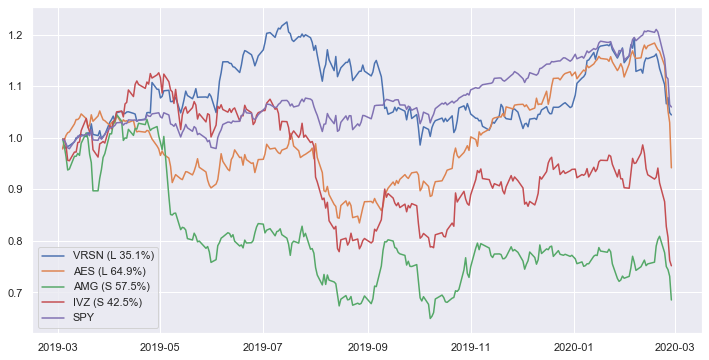

In [48]:
plt.figure(figsize=(12,6))
plt.plot(((r1+1).cumprod()))
plt.plot(((r2+1).cumprod()))
plt.plot(((r3+1).cumprod()))
plt.plot(((r4+1).cumprod()))
plt.plot((r+1).cumprod())
plt.legend(['VRSN (L 35.1%)', 'AES (L 64.9%)', 'AMG (S 57.5%)', 'IVZ (S 42.5%)', 'SPY'])
plt.show()